In [1]:
import pandas as pd
import scanpy as sc
from pf2rnaseq.imports import prepare_dataset
from pf2rnaseq.factorization import pf2, correct_conditions
import anndata

# X = sc.read_10x_h5("/opt/extra-storage/CRC/GSE178341/crc10x_full_c295v4_submit.h5")

# df_cluster = pd.read_csv("/opt/extra-storage/CRC/GSE178341/crc10x_full_c295v4_submit_cluster.csv", index_col=0)
# df_meta = pd.read_csv("/opt/extra-storage/CRC/GSE178341/crc10x_full_c295v4_submit_metatables.csv", index_col=0)

# X.obs = X.obs.merge(df_meta, left_index=True, right_index=True)
# X.obs = X.obs.merge(df_cluster, left_index=True, right_index=True)

# X_norm = prepare_dataset(X.copy(), "PID", 0.1)

# print(X_norm[:, "AXL"])

# X_pf2 = pf2(X_norm, rank=50, tolerance=1e-7)

# X_pf2.write("/opt/extra-storage/CRC/GSE178341/crc10x_full_50cmp.h5ad")

In [2]:
X_pf2 = anndata.read_h5ad("/opt/extra-storage/CRC/GSE178341/crc10x_full_50cmp.h5ad")

# X_pf2 = X_pf2[X_pf2.obs["clMidwayPr"] == "Epi", :]

# X_pf2 = pf2(X_pf2, rank=50, tolerance=1e-7)

X_pf2.uns["Pf2_A"] = correct_conditions(X_pf2)
X_pf2.obs.columns

Index(['SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM',
       'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'PatientTypeID',
       'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status',
       'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple',
       'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage',
       'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus',
       'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race',
       'batchID', 'clTopLevel', 'clMidwayPr', 'cl295v11SubShort',
       'cl295v11SubFull', 'condition_unique_idxs'],
      dtype='object')

In [3]:
sell = X_pf2.obsm["X_pf2_PaCMAP"][:, 0] > 12

X_pf2.obs.loc[sell, "clTopLevel"] = "Epi"

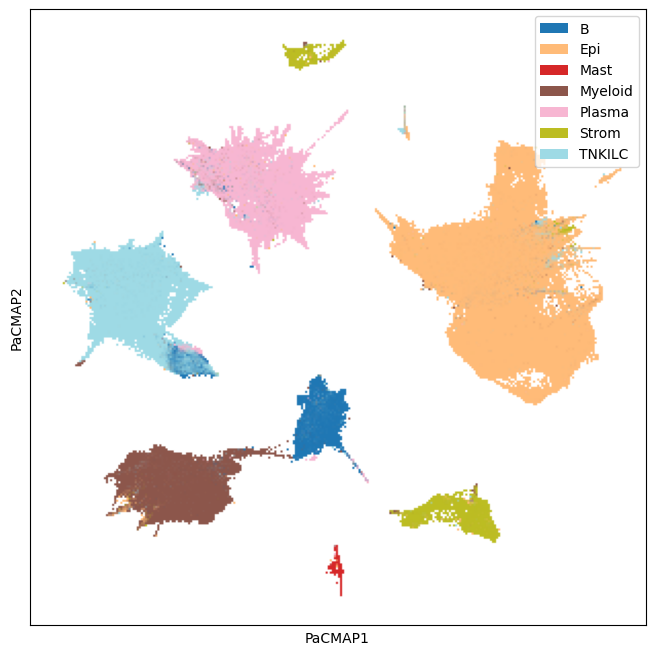

In [13]:
from pf2rnaseq.figures.commonFuncs.plotPaCMAP import plot_labels_pacmap, plot_gene_pacmap, plot_wp_pacmap
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 8))
plot_labels_pacmap(X_pf2, "clTopLevel", plt.gca())

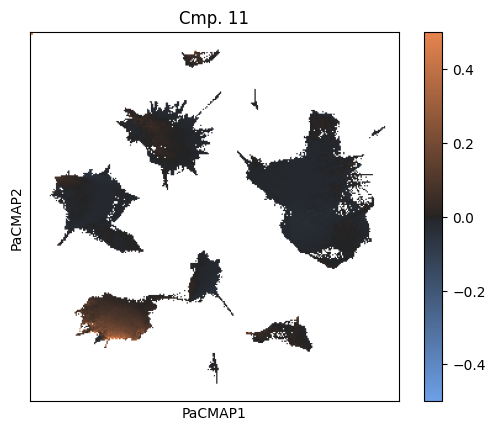

In [16]:
# FAP+ fibroblasts, consistent with Qi et al.

plot_wp_pacmap(X_pf2, 11, plt.gca(), 0.5)

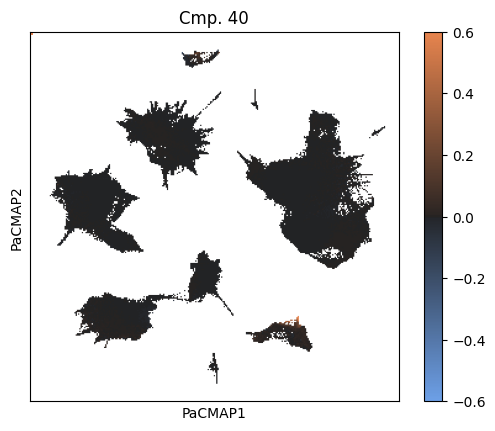

In [70]:
# Tregs. Different from the conclusions of Qi et al, but can write about this.


plot_wp_pacmap(X_pf2, 40, plt.gca(), 0.6)

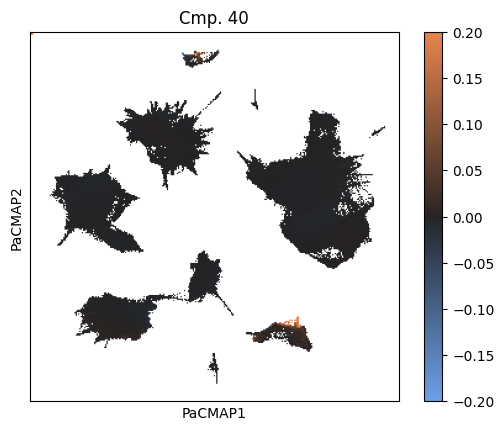

In [60]:
# Tumor components: 33
# This is the AXL component

plot_wp_pacmap(X_pf2, ii, plt.gca(), 0.2)
ii = ii + 1

In [ ]:
plot_gene_pacmap("AXL", "Pf2", X_pf2, plt.gca())

In [ ]:
plot_gene_pacmap("ANXA1", "Pf2", X_pf2, plt.gca())

In [ ]:
plot_gene_pacmap("AXL", "Pf2", X_pf2, plt.gca())

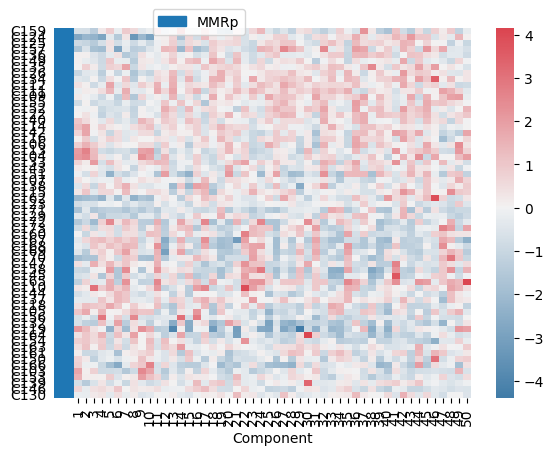

In [71]:
from pf2rnaseq.figures.commonFuncs.plotFactors import plot_condition_factors

plot_condition_factors(X_pf2, plt.gca(), condition_label="HistologicGradeSimpleGradeSimple", cond_group_labels=X_pf2.obs["MMRStatus"], groupConditions=True)

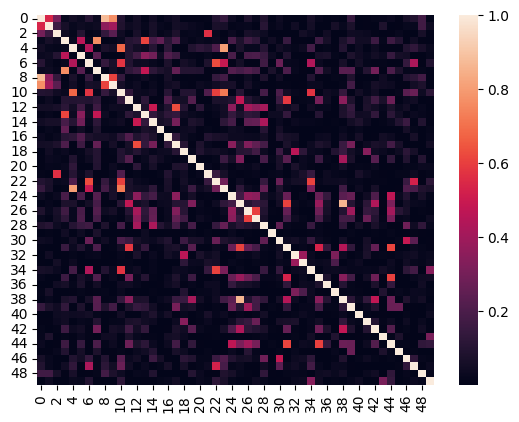

In [3]:
import numpy as np
import seaborn as sns

sns.heatmap(np.corrcoef(X_pf2.uns["Pf2_A"].T) ** 2.0);

In [61]:
np.where(np.abs(X_pf2[:, "SPP1"].varm["Pf2_C"]).flatten() > 0.08)

(array([10]),)

In [68]:
np.where(np.abs(X_pf2[:, "CD4"].varm["Pf2_C"]).flatten() > 0.04)

(array([23]),)